In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms

# code borrowed from https://github.com/jvanvugt/pytorch-unet
from unet import UNet 

import PIL
import matplotlib.pyplot as plt
import cv2

import numpy as np
import sys, glob

from tensorboardX import SummaryWriter

import scipy.ndimage 

import time
import math
import tables

import random

from sklearn.metrics import confusion_matrix

from data_loader import *
from utils import *

%load_ext autoreload
%autoreload 2

In [3]:
data_loader = get_dataloader()
train_loader = data_loader['train']
val_loader = data_loader['val']

In [4]:
train_dataset = train_loader.dataset

In [5]:
len(train_dataset)

925

In [14]:
img, mask, x = train_dataset[0]

In [16]:
type(img), type(mask), type(x)

(torch.Tensor, numpy.ndarray, numpy.ndarray)

In [19]:
img.shape, mask.shape, x.shape

(torch.Size([3, 256, 256]), (256, 256), (256, 256))

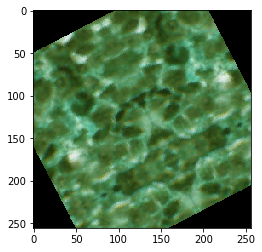

In [20]:
plt.imshow(np.moveaxis(img.numpy(),0,-1))

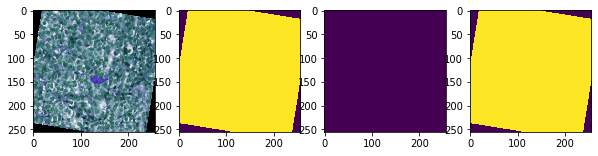

In [22]:
# visualize a single example to verify that it is correct
(img,patch_mask,patch_mask_weight) = train_dataset[7]
fig, ax = plt.subplots(1,4, figsize=(10,4))  # 1 row, 2 columns

#build output showing original patch  (after augmentation), class = 1 mask, weighting mask, overall mask (to see any ignored classes)
ax[0].imshow(np.moveaxis(img.numpy(),0,-1))
ax[1].imshow(patch_mask==1)
ax[2].imshow(patch_mask_weight)
ax[3].imshow(patch_mask)